<a href="https://colab.research.google.com/github/Shakilgithub20/Basic-ML/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline

## Importing the dataset

In [ ]:
dataset=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML_Dataset/50_Startups.csv")
dataset.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


## Feature information

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,4]
print(X)

    R&D Spend  Administration  Marketing Spend       State
0   165349.20       136897.80        471784.10    New York
1   162597.70       151377.59        443898.53  California
2   153441.51       101145.55        407934.54     Florida
3   144372.41       118671.85        383199.62    New York
4   142107.34        91391.77        366168.42     Florida
5   131876.90        99814.71        362861.36    New York
6   134615.46       147198.87        127716.82  California
7   130298.13       145530.06        323876.68     Florida
8   120542.52       148718.95        311613.29    New York
9   123334.88       108679.17        304981.62  California
10  101913.08       110594.11        229160.95     Florida
11  100671.96        91790.61        249744.55  California
12   93863.75       127320.38        249839.44     Florida
13   91992.39       135495.07        252664.93  California
14  119943.24       156547.42        256512.92     Florida
15  114523.61       122616.84        261776.23    New Yo

In [ ]:
print(y)

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64


## Dropping State Column

In [ ]:
states = pd.get_dummies(X['State'], drop_first = True)
X = X.drop('State', axis = 1)
X = pd.concat([X,states], axis = 1)
print(X)

    R&D Spend  Administration  Marketing Spend  Florida  New York
0   165349.20       136897.80        471784.10        0         1
1   162597.70       151377.59        443898.53        0         0
2   153441.51       101145.55        407934.54        1         0
3   144372.41       118671.85        383199.62        0         1
4   142107.34        91391.77        366168.42        1         0
5   131876.90        99814.71        362861.36        0         1
6   134615.46       147198.87        127716.82        0         0
7   130298.13       145530.06        323876.68        1         0
8   120542.52       148718.95        311613.29        0         1
9   123334.88       108679.17        304981.62        0         0
10  101913.08       110594.11        229160.95        1         0
11  100671.96        91790.61        249744.55        0         0
12   93863.75       127320.38        249839.44        1         0
13   91992.39       135495.07        252664.93        0         0
14  119943

## Onehot Encoding

In [ ]:
ct= ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')
X=np.array(ct.fit_transform(X))
print(X)

[[1.0000000e+00 0.0000000e+00 1.6534920e+05 1.3689780e+05 4.7178410e+05
  1.0000000e+00]
 [1.0000000e+00 0.0000000e+00 1.6259770e+05 1.5137759e+05 4.4389853e+05
  0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 1.5344151e+05 1.0114555e+05 4.0793454e+05
  0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 1.4437241e+05 1.1867185e+05 3.8319962e+05
  1.0000000e+00]
 [0.0000000e+00 1.0000000e+00 1.4210734e+05 9.1391770e+04 3.6616842e+05
  0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 1.3187690e+05 9.9814710e+04 3.6286136e+05
  1.0000000e+00]
 [1.0000000e+00 0.0000000e+00 1.3461546e+05 1.4719887e+05 1.2771682e+05
  0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 1.3029813e+05 1.4553006e+05 3.2387668e+05
  0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 1.2054252e+05 1.4871895e+05 3.1161329e+05
  1.0000000e+00]
 [1.0000000e+00 0.0000000e+00 1.2333488e+05 1.0867917e+05 3.0498162e+05
  0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 1.0191308e+05 1.1059411e+05 2.2916095e+05
  0.0000000e+00]
 [1.0000000e+00 0.000

## Splitting the dataset into the Training set and Test set

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2,random_state = 2)
print(X_train)

[[1.0000000e+00 0.0000000e+00 7.7044010e+04 9.9281340e+04 1.4057481e+05
  1.0000000e+00]
 [1.0000000e+00 0.0000000e+00 5.4205000e+02 5.1743150e+04 0.0000000e+00
  1.0000000e+00]
 [1.0000000e+00 0.0000000e+00 9.4657160e+04 1.4507758e+05 2.8257431e+05
  1.0000000e+00]
 [0.0000000e+00 1.0000000e+00 9.3863750e+04 1.2732038e+05 2.4983944e+05
  0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 7.2107600e+04 1.2786455e+05 3.5318381e+05
  1.0000000e+00]
 [0.0000000e+00 1.0000000e+00 5.5493950e+04 1.0305749e+05 2.1463481e+05
  0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 7.8013110e+04 1.2159755e+05 2.6434606e+05
  0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 1.5344151e+05 1.0114555e+05 4.0793454e+05
  0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 6.4664710e+04 1.3955316e+05 1.3796262e+05
  0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 1.1994324e+05 1.5654742e+05 2.5651292e+05
  0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 6.1994480e+04 1.1564128e+05 9.1131240e+04
  0.0000000e+00]
 [1.0000000e+00 0.000

In [ ]:
print(X_test)

[[0.0000000e+00 1.0000000e+00 2.8663760e+04 1.2705621e+05 2.0112682e+05
  0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.3542692e+05 0.0000000e+00
  0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 6.6051520e+04 1.8264556e+05 1.1814820e+05
  0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 1.2333488e+05 1.0867917e+05 3.0498162e+05
  0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 9.1992390e+04 1.3549507e+05 2.5266493e+05
  0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 1.6534920e+05 1.3689780e+05 4.7178410e+05
  1.0000000e+00]
 [1.0000000e+00 0.0000000e+00 2.2177740e+04 1.5480614e+05 2.8334720e+04
  0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 1.3154600e+03 1.1581621e+05 2.9711446e+05
  0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 3.8558510e+04 8.2982090e+04 1.7499930e+05
  0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 6.7532530e+04 1.0575103e+05 3.0476873e+05
  0.0000000e+00]]


## Linear Regression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set Results

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.array(y_pred)
result = pd.DataFrame(y_pred, columns =['Predicted Profit'])
print(result)

   Predicted Profit
0      74061.284711
1      46009.237988
2      99637.263608
3     155786.532294
4     127636.763495
5     192765.185978
6      63906.999724
7      54935.144159
8      84532.352380
9     109460.297120


In [ ]:
print(y_test)

36     90708.19
47     42559.73
28    103282.38
9     149759.96
13    134307.35
0     192261.83
44     65200.33
46     49490.75
39     81005.76
23    108733.99
Name: Profit, dtype: float64


In [ ]:
score = r2_score(y_test,y_pred)
print(score)

0.9783259006626441


## Plot train-test

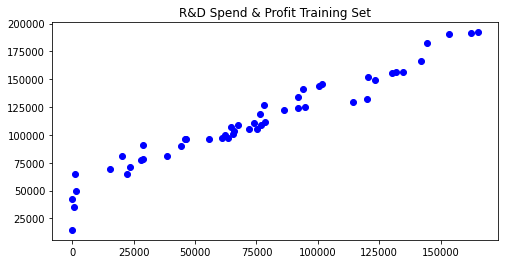

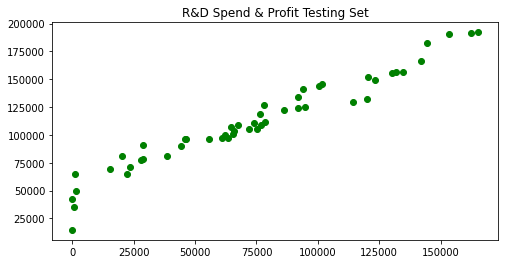

In [ ]:
X_train = dataset["R&D Spend"].values.reshape(-1,1)
y_train = dataset["Profit"]

X_test = dataset["R&D Spend"].values.reshape(-1,1)
y_test = dataset["Profit"]

plt.figure(figsize=(8,4))
plt.title("R&D Spend & Profit Training Set")
plt.scatter(X_train,y_train,c = "b")

plt.figure(figsize=(8,4))
plt.title("R&D Spend & Profit Testing Set")
plt.scatter(X_test,y_test, c="g")

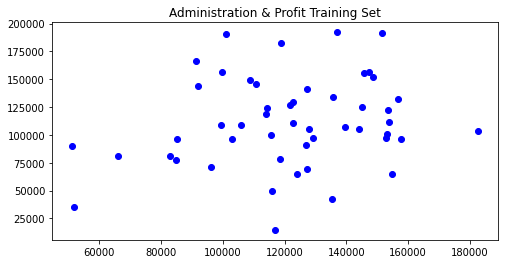

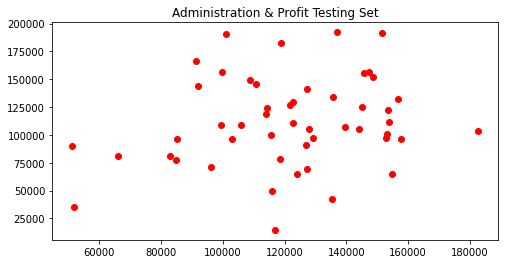

In [ ]:
X_train = dataset["Administration"].values.reshape(-1,1)
y_train = dataset["Profit"]

X_test = dataset["Administration"].values.reshape(-1,1)
y_test = dataset["Profit"]

plt.figure(figsize=(8,4))
plt.title("Administration & Profit Training Set")
plt.scatter(X_train,y_train,c = "b")

plt.figure(figsize=(8,4))
plt.title("Administration & Profit Testing Set")
plt.scatter(X_test,y_test, c="red")

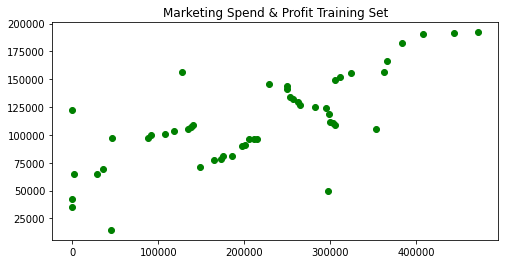

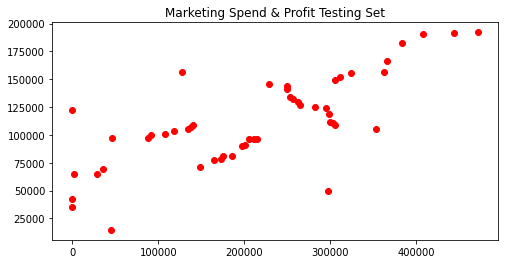

In [ ]:
X_train = dataset["Marketing Spend"].values.reshape(-1,1)
y_train = dataset["Profit"]

X_test = dataset["Marketing Spend"].values.reshape(-1,1)
y_test = dataset["Profit"]

plt.figure(figsize=(8,4))
plt.title("Marketing Spend & Profit Training Set")
plt.scatter(X_train,y_train,c = "g")

plt.figure(figsize=(8,4))
plt.title("Marketing Spend & Profit Testing Set")
plt.scatter(X_test,y_test, c="red")

## Seaborn




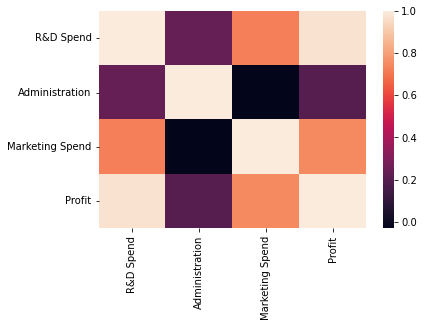

In [ ]:
sns.heatmap(dataset.corr());

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


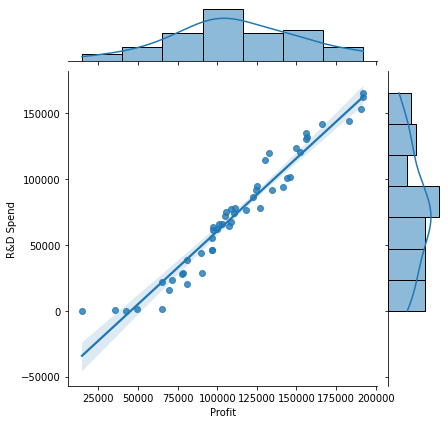

In [ ]:
sns.jointplot("Profit", "R&D Spend", data=dataset, kind='reg' );

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


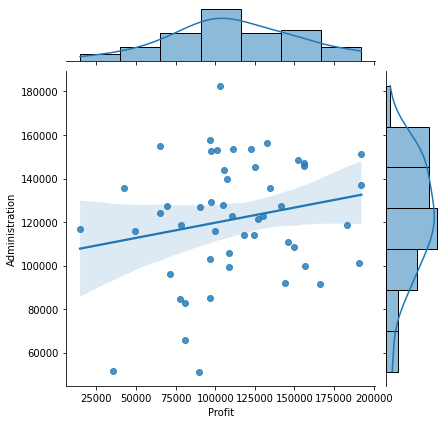

In [ ]:
sns.jointplot("Profit", "Administration", data=dataset, kind='reg');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


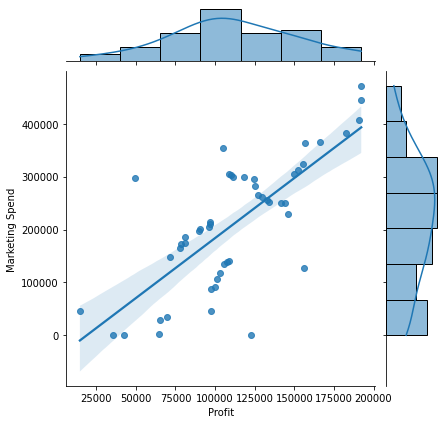

In [ ]:
sns.jointplot("Profit", "Marketing Spend", data=dataset, kind='reg');

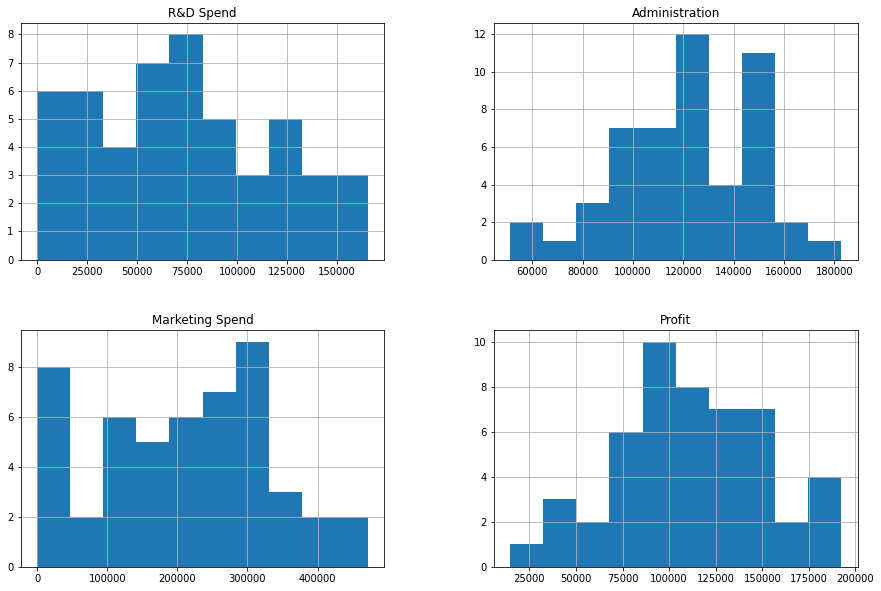

In [ ]:
dataset.hist(figsize =(15,10))
plt.show()